# IFT712 - Projet de fin de session

## Sujet

Classification de feuilles d'arbres en utilisant la bibliothèque Sklearn et comparaison des classifieurs présents dans celle-ci pour trouver le modèle adapté à l'étude des plantes. Pour ce faire, on utilisera la validation croisée et la recherche d’hyperparamètres pour chacuns des classifieurs.



## Equipe 8 :


___
___

# 0. Configuration

In [1]:
'''
 Imporation of python libraries
'''
from LogisticRegression_classifieur import LogisticRegressionClassifier
from knn_classifier import KNNClassifier
from decision_trees_classifier import DTSClassifier
from adaboost_classifieur import adaboostClassifier
from svm_classifieur import svmClassifier
from neural_network_classifier import NNClassifier
from random_forest_classifieur import RandForestClassifier
from data_manager import data_extract
from data_manager import data_cleaning
from data_manager import generate_combinations_for_attributes
from data_manager import to_array
from data_manager import ACP
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import KFold 
import utils_affichage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

___
___

# 1. Préparation des données

On utilise les données de classification de feuilles du site [Kaggle](https://www.kaggle.com/c/leaf-classification/data).
Les données sont composées de 2 ensembles (train et test). 

Chaque échantillons est caractérisé par :
- un id unique par image 
- 64 attributs pour la marge de la feuille
- 64 attributs pour la forme de la feuille
- 64 attributs pour la texture de la feuille

[[ 7.69279231e-02  1.67920665e-01 -8.17340295e-04 -3.16866857e-03
  -5.86710449e-02  2.25181078e-01 -1.44926078e-02 -1.87681515e-03
   7.05177735e-03  1.12476353e-02  1.03999786e-01 -5.08566321e-02
   2.06926089e-01 -1.48385103e-02 -6.36011959e-02 -6.76077601e-04
   4.73043388e-03  6.54674654e-02  3.80330634e-03  3.41828344e-03
  -5.90585232e-02 -3.19322856e-02  5.39515975e-04 -2.34680218e-02
  -3.86136476e-02 -2.76630199e-02 -2.45681312e-02 -4.17598179e-02
   5.16010579e-02 -3.75976119e-02 -6.29031715e-02 -5.07434643e-02
   3.25192275e-02 -9.85223862e-04  3.50331730e-02  5.94194008e-02
  -2.49856693e-03 -6.74230528e-02 -5.59522824e-02 -4.30168292e-02
  -3.18188968e-02  3.28707631e-02 -3.07357043e-02 -3.87278319e-02
   4.21231144e-02 -5.03040097e-02 -7.42075855e-02 -7.13248178e-02
  -4.31591844e-02 -4.49684554e-02  1.12049044e-01 -5.87412630e-03
  -5.19420176e-02 -5.41069625e-02 -3.56637295e-02 -3.42537699e-02
  -9.79112572e-04  4.81083056e-02  1.81103170e-02  5.70475663e-03
  -1.04650

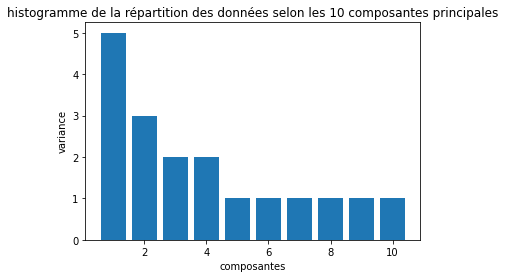

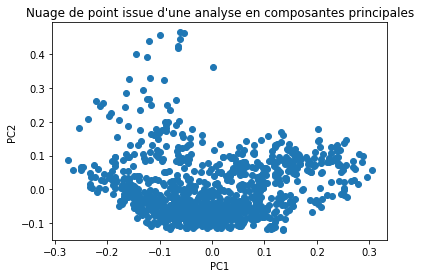

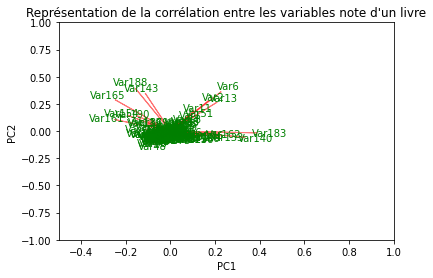

In [2]:
data_path_train = './data/train.csv'
data_path_test = './data/test.csv'

#Extract data for training dataset
data_attributes_train, data_train_df, ids_train, labels = data_extract(data_path_train,dataset = "train")

#Extract data for testing dataset
res = data_extract(data_path_test,dataset = "test")
data_attributes_test = res[0]
data_test_df = res[1]
ids_test = res[2]

#Clean data
#print(data_train_df)

max_len_generated_subset = 4

#generate all combinations for attributes
generated_subsets = generate_combinations_for_attributes(data_attributes_train,max_len_generated_subset)



In [3]:
# Dataset Preparation
# Training data 
data_train = pd.read_csv("./data/train.csv")
data_train.set_index("id", inplace=True)

# Test data
data_test = pd.read_csv("./data/test.csv")
data_test.set_index("id", inplace=True)

display(data_train)

# Separation of caracteristiques/tragets of data
# Training data 
y_train = data_train["species"]
X_train = data_train.drop(["species"], axis=1)

# Test data (no target column)
X_test = data_test.copy()

# Encoding "One-hot" for training targets 
class_names = np.unique(y_train)
lblBin = LabelBinarizer().fit(y_train)

#Data normalization
# Training data 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std

# Test data
X_test = (X_test - mean) / std

# Splitting the training data for validation
val_perc = 0.3
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_perc, random_state=0, shuffle=True)

# Encoding targets "one-hot"
y_train_not_bin = y_train.copy()
y_train = lblBin.transform(y_train)
y_val_not_bin = y_val.copy()
y_val = lblBin.transform(y_val)


,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


In [60]:
# chercher attribut moins interessant (trop de valeur 0)
data_train_pure = data_train.copy().drop(columns=['species'])
num_rows = data_train_pure.shape[0]
low_information_cols = [] 
high_information_cols = []

for name, values in data_train_pure.iteritems():
    cnts = values.value_counts(dropna=False)
    pct = (cnts/num_cols).iloc[0]
    
    if pct > 0.01:
        low_information_cols.append(name)
        print('{0}: {1:.5f}%'.format(name, pct*100))
    
    if pct < 0.01 :
        high_information_cols.append(name)
        print('{0}: {1:.5f}%'.format(name, pct*100))

print(high_information_cols)

# chercher attribut moins interessant (d'après IQR)
low_information_cols_IQR = [] 
high_information_cols_IQR = []
for name in high_information_cols:
    cnts = data_train_pure[name]
    a = cnts.quantile(0.75)
    b = cnts.quantile(0.25)
    c = cnts
    c[:][(c>=(a-b)*1.5+a)|(c<=b-(a-b)*1.5)]=np.nan
    cnts = cnts.value_counts(dropna=False)
    pct = (cnts/num_cols).iloc[0]
    
    if pct > 0.005:
        low_information_cols_IQR.append(name)
        print('{0}: {1:.5f}%'.format(name, pct*100))
    
    if pct < 0.005 :
        high_information_cols_IQR.append(name)
        print('{0}: {1:.5f}%'.format(name, pct*100))

print(high_IQR_cols)

margin1: 20.50505%
margin2: 20.90909%
margin3: 5.25253%
margin4: 8.68687%
margin5: 20.50505%
margin6: 26.66667%
margin7: 12.82828%
margin8: 81.31313%
margin9: 24.84848%
margin10: 9.19192%
margin11: 15.35354%
margin12: 15.95960%
margin13: 9.39394%
margin14: 31.11111%
margin15: 13.93939%
margin16: 98.68687%
margin17: 7.77778%
margin18: 7.47475%
margin19: 12.22222%
margin20: 10.70707%
margin21: 17.37374%
margin22: 46.06061%
margin23: 91.81818%
margin24: 48.28283%
margin25: 31.51515%
margin26: 7.17172%
margin27: 52.32323%
margin28: 10.10101%
margin29: 4.84848%
margin30: 9.69697%
margin31: 31.91919%
margin32: 47.97980%
margin33: 7.57576%
margin34: 69.39394%
margin35: 19.49495%
margin36: 10.10101%
margin37: 8.88889%
margin38: 5.25253%
margin39: 11.91919%
margin40: 29.09091%
margin41: 43.73737%
margin42: 8.08081%
margin43: 15.55556%
margin44: 10.70707%
margin45: 6.66667%
margin46: 27.17172%
margin47: 11.01010%
margin48: 18.58586%
margin49: 48.08081%
margin50: 30.60606%
margin51: 12.02020%
mar

### On remarque que l'ensemble des lignes ont la même quantité d'information. Ainsi, le choix des 5% peut se faire de façon aléatoire sans risquer une perte d'information.

___
___

# 2. Classification

Dans cette partie nous allons mettre en place 6 classifieurs :
- Random Forest
- Neural Network
- SVM
- AdaBoost
- Decision Tree
- KNeighbors
- Regression linéaire


In [4]:
# Resultat for Visual Comparison
accu_dict = {}

# Dictionary  of labels for test preditions and list of score fonctions
pred_dict = {}
scorers = {"Accuracy": 'accuracy', "Precision": 'precision_micro', "F1": 'f1_micro'}


___


## Classifieur par Random Forest
Une `random forest` est un estimateur qui utilise plusieurs arbres de décision pour palier à la tendance de sur-apprentissage de ceux-ci. Chaque arbre apprend sur les données d'entrée avec des paramètres différents puis l'estimateur classe les points par la probabilité la plus haute pour tout les arbres.


In [ ]:
rand_forest_classifier = RandForestClassifier()
depth_max = 20
estimators_list = [50,100,150]
min_samples_split = [2,3]
accuracy, f1, precision = rand_forest_classifier.cross_validation(data_train_df[:500],labels[:500],range(1,depth_max),estimators_list,min_samples_split)

print("Accuracy ",accuracy)
print("f1 ",f1)
print("precision ",precision)

predictions = rand_forest_classifier.predict(data_train_df[500:])
print(ac(predictions,labels[500:]))

### RF - Entrainement

On entraine maintenant le modèle sur les données completes.

In [ ]:
model = RandForestClassifier(X_train, y_train_not_bin, X_val, y_val_not_bin, class_names, scorers)
model.train_default(verbose=True)

print(model.__class__.__name__)

Accuracy train: 100.000%
Accuracy validation: 94.276%
RandForestClassifier


### RF - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `n_estimators` : Nombre d'arnres dans la forêt (plus grand = meilleurs approximation, plus long à calculer)
- `max_depth` : La profondeur maximal des arbres (plus grand = plus de sur-apprentissage, plus long à calculer)
- `min_samples_leaf` : Nombre d'éléments minimum necessaire dans un noeud
- `min_samples_split` : Nombre d'éléments dans un noeud pour pouvoir le séparer
- `max_features` : Nombre de caractéristique considéré pour séparer un noeud 

In [ ]:
# hyperparametre research
randForest_param = {
    'n_estimators': [10, 50, 100, 200, 300],   
    'max_depth': [None, 8, 16, 32],   
    'min_samples_leaf': [2, 3, 4, 5],   
    'min_samples_split': [4, 6, 8, 10],   
    'max_features': ['log2', 'sqrt']  
}

model = RandForestClassifier(X_train, y_train_not_bin, X_val, y_val_not_bin, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm = model.train_hyperparameter(randForest_param, random_search=True, verbose=True)

Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best cross val accuracy : 0.9005213220727766
Best estimator:
RandomForestClassifier(max_depth=32, max_features='log2', min_samples_leaf=2,
                       min_samples_split=6, n_jobs=4)

Accuracy train: 100.000%
Accuracy validation: 91.919%


In [ ]:
# Append accuracy percentage for visual comparison
accu_dict["Random Forest"] = accu_val_hyperparm*100

### RF - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [ ]:
NN_pred = model.predict(X_test)
NN_pred_label = lblBin.inverse_transform(NN_pred)

pred_dict["Neural network"] = NN_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

### NN - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [ ]:
NN_param = {
    'learning_rate_init': np.arange(0.0001, .5, 0.1),
    'solver': ['sgd'],
}
model = NNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train_hyperparameter(NN_param, random_search=False, verbose=True)


In [ ]:
aff_NN = utils_affichage.Affichage(model)

# display(aff_NN.hyper_results())

aff_NN.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_NN.class_report(y_val, y_val_pred, mean_only=True))

aff_NN.plot(param_abscissa="learning_rate_init")

___


## Classifieur par SVM
Les machines à vecteurs support (SVM) sont des algorithmes d’apprentissage supervisé  utilisées pour la classification et la régression. Elles reposent souvent sur l’utilisation de noyaux qui permettent de transformer l’espace de représentation des données d’entrées en un espace de plus grande dimension, dans lequel il existe une séparation linéaire, le but est de maximiser la distance entre les groupes de données.

### SVM- Entrainement

On entraine sans la recherche d hyper-parametres.

In [5]:
model = svmClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train, accu_val = model.train_sans_grid()

print('Accuracy train: {:.3%}'.format(accu_train))
print('Accuracy validation: {:.3%}'.format(accu_val))



Accuracy train: 88.745%
Accuracy validation: 60.269%


### SVM - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `estimator__C` : ajoute une pénalité pour chaque point de données mal classé
- `estimator__kernel` : choix des noyaux 
- `estimator__gamma` :  paramètre pour les hyperplans non linéaires. Plus il est grand, plus la machine essaie de s'ajuster exactement sur l'ensemble des données d'apprentissage.

In [6]:
svm_param = {'estimator__C': [0.1, 1, 100, 1000],
             'estimator__kernel': ['rbf', 'poly', 'sigmoid'],
             'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


In [7]:
model = svmClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(svm_param, random_search=True)

print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))


Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_cross_val_acc : 0.8024293608591387

Best estimator:
MultiOutputClassifier(estimator=SVC(C=1000, gamma=1, kernel='poly',
                                    probability=True),
                      n_jobs=4)
[Estimator parameters]


{'estimator__C': 1000,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 1,
 'estimator__kernel': 'poly',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1000, gamma=1, kernel='poly', probability=True),
 'n_jobs': 4}

Accuracy train: 100.000%
Accuracy validation: 83.502%


In [8]:
model = svmClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(svm_param, random_search=False)

print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))


Using complet search:
Fitting 5 folds for each of 60 candidates, totalling 300 fits
best_cross_val_acc : 0.9322281305390471

Best estimator:
MultiOutputClassifier(estimator=SVC(C=100, gamma=0.001, probability=True),
                      n_jobs=4)
[Estimator parameters]


{'estimator__C': 100,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 0.001,
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=100, gamma=0.001, probability=True),
 'n_jobs': 4}

Accuracy train: 100.000%
Accuracy validation: 92.929%


In [9]:
# Append accuracy percentage for visual comparison
accu_dict["SVM"] = accu_val_hyperparm*100

### SVM- Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [10]:
svm_pred = model.predict(X_test)
svm_pred_label = lblBin.inverse_transform(svm_pred)

pred_dict["SVM"] = svm_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)


,SVM
0,Quercus_Agrifolia
1,Quercus_Afares
2,Acer_Circinatum
3,Castanea_Sativa
4,Alnus_Viridis
...,...
589,Acer_Circinatum
590,Alnus_Rubra
591,Quercus_Canariensis
592,Quercus_Phillyraeoides


### RF - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [11]:
RF_param = {
    'n_estimators': range(2, 150, 5),
}
model = RandForestClassifier(X_train, y_train_not_bin, X_val, y_val_not_bin, class_names, scorers)
model.train_hyperparameter(RF_param, random_search=False, verbose=True)


Using complet search:
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best cross val accuracy : 0.9466583255135023
Best estimator:
RandomForestClassifier(n_estimators=132, n_jobs=4)

Accuracy train: 100.000%
Accuracy validation: 94.949%


(1.0, 0.9494949494949495)

Model with rank: 1
Mean validation Accuracy: 0.947 (std: 0.015)
Parameters: {'n_estimators': 132}

Model with rank: 2
Mean validation Accuracy: 0.944 (std: 0.021)
Parameters: {'n_estimators': 107}

Model with rank: 2
Mean validation Accuracy: 0.944 (std: 0.022)
Parameters: {'n_estimators': 147}



precision      1.000000
recall         0.717172
f1-score       0.835294
support      297.000000
Name: micro avg, dtype: float64

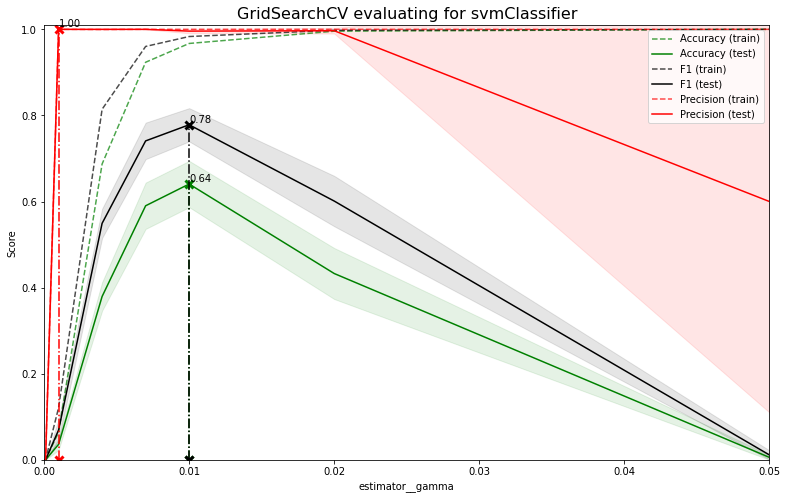

In [13]:
aff_RF = utils_affichage.Affichage(model)

# display(aff_RF.hyper_results())

aff_RF.best_estimators(n_top=2)

aff_RF.plot(param_abscissa="n_estimators")

___

## Classifieur par réseau de neurones
Un réseau de neurones est un algorithme d’apprentissage supervisé de plusiers fonctions d’apprentissage. Il calcule la prédiction et la compare avec la valeur de y à l'aide de la fonction de coût et l'erreur est propagé en arrière afin de mettre à jour les poids des différentes fonctions.

### NN - Entrainement

On entraine maintenant le modèle sur les données completes.

In [ ]:
model = NNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train_default(verbose=True)

### NN - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `hidden_layer_sizes` : Taille des couches cachées du réseau
- `solveur` : Méthode d'optimisation des poids `W`
- `learning_rate_init` : Longueur initial des pas lors de la descente de gradient
- `alpha` : Terme de régularisation L2, correspond à la pénalité sur la taille des poids dans `W`

In [ ]:
# recherche hyperparametre
NN_param = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [1e-2, 1e-1, 1.0, 10.0],
    'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
}

model = NNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm = model.train_hyperparameter(NN_param, random_search=True, verbose=True)

In [ ]:
# Append accuracy percentage for visual comparison
accu_dict["Neural network"] = accu_val_hyperparm*100


### NN - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [ ]:
NN_pred = model.predict(X_test)
NN_pred_label = lblBin.inverse_transform(NN_pred)

pred_dict["Neural network"] = NN_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

### NN - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [ ]:
NN_param = {
    'learning_rate_init': np.arange(0.0001, .5, 0.1),
    'solver': ['sgd'],
}
model = NNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train_hyperparameter(NN_param, random_search=False, verbose=True)


In [ ]:
aff_NN = utils_affichage.Affichage(model)

# display(aff_NN.hyper_results())

aff_NN.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_NN.class_report(y_val, y_val_pred, mean_only=True))

aff_NN.plot(param_abscissa="learning_rate_init")

In [ ]:
aff_NN.printNameAndSocrers()

___


## Classifieur par SVM
Les machines à vecteurs support (SVM) sont des algorithmes d’apprentissage supervisé  utilisées pour la classification et la régression. Elles reposent souvent sur l’utilisation de noyaux qui permettent de transformer l’espace de représentation des données d’entrées en un espace de plus grande dimension, dans lequel il existe une séparation linéaire, le but est de maximiser la distance entre les groupes de données.

In [ ]:
model = svmClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train, accu_val = model.train_sans_grid()

print('Accuracy train: {:.3%}'.format(accu_train))
print('Accuracy validation: {:.3%}'.format(accu_val))


In [ ]:
SVM_param = {
    'estimator__n_estimators': np.arange(10, 100, 10),
    'estimator__learning_rate': [0.01, 0.05, 0.1, 1],
}

model = svmClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(SVM_param, random_search=True)

In [ ]:
print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))

In [ ]:
# Append accuracy percentage for visual comparison
accu_dict["SVM"] = accu_val_hyperparm*100

In [ ]:
SVM_pred = model.predict(X_test)
SVM_pred_label = lblBin.inverse_transform(SVM_pred)

pred_dict["SVM"] = SVM_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)


In [ ]:
SVM_param = {
    'estimator__n_estimators': np.arange(10, 100, 10)
}
model = adaboostClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train(SVM_param, random_search=False)


In [ ]:
aff_SVM = utils_affichage.Affichage(model)

# display(aff_SVM.hyper_results())

aff_SVM.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_SVM.class_report(y_val, y_val_pred, mean_only=True))

aff_SVM.plot(param_abscissa="estimator__gamma")


___


## Classifieur par Adaboost
L’adaptative boosting est un algorithme de boosting qui regroupe plusieurs classifieurs faibles en leur donnant un poids selon leurs performances pour en faire un classifieur fort.

### Adaboost - Entrainement

On entraine sans la recherche d hyper-parametres.

In [ ]:
model = adaboostClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train, accu_val = model.train_sans_grid()

print('Accuracy train: {:.3%}'.format(accu_train))
print('Accuracy validation: {:.3%}'.format(accu_val))


### Adaboost - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `estimator__n_estimators` :  nombre de modèles à entraîner de manière itérative
- `estimator__learning_rate` : contribution de chaque modèle aux pondérations

In [ ]:
adaboost_param = {
    'estimator__n_estimators': np.arange(10, 100, 10),
    'estimator__learning_rate': [0.01, 0.05, 0.1, 1],
}

model = adaboostClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(adaboost_param, random_search=True)

In [ ]:
print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))

In [ ]:
# Append accuracy percentage for visual comparison
accu_dict["AdaBoost"] = accu_val_hyperparm*100

### Adaboost - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [ ]:
adaboost_pred = model.predict(X_test)
adaboost_pred_label = lblBin.inverse_transform(adaboost_pred)

pred_dict["AdaBoost"] = adaboost_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)


### Adaboost - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [ ]:
Ada_param = {
    'estimator__n_estimators': np.arange(10, 100, 10)
}
model = adaboostClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train(Ada_param, random_search=False)


In [ ]:


aff_Ada = utils_affichage.Affichage(model)

#display(aff_Ada.hyper_results())

aff_Ada.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_Ada.class_report(y_val, y_val_pred, mean_only=True))

aff_Ada.plot(param_abscissa="estimator__n_estimators")

___


## Classifieur par Decision trees
Une `decision trees` est un méthode d’apprentissage supervisé non paramétrique pour la classification et la régression. Notre objectif est de créer un modèle qui prédit la valeur de la variable cible en apprenant des règles de décision simples déduites des caractéristiques des données. L’arbre peut être considéré comme une approximation constante par segments.


In [ ]:
decision_tree_classifier = DTSClassifier()
depth_max = 20
min_samples_split = [2,3,4]
criterion = ["gini","entropy"]
min_samples_leaf = [1,2]
accuracy, f1, precision = decision_tree_classifier.cross_validation(data_train_df[:500],labels[:500],range(1,depth_max),min_samples_split,criterion,min_samples_leaf)

print("Accuracy ",accuracy)
print("f1 ",f1)
print("precision ",precision)

predictions = decision_tree_classifier.predict(data_train_df[500:])
print(ac(predictions,labels[500:]))

In [ ]:
# Append accuracy percentage for visual comparison
accu_dict["DTS"] = accuracy*100

In [ ]:
decisiontree_pred_label = decision_tree_classifier.predict(data_test_df)

pred_dict["DTS"] = decisiontree_pred_label

df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)


In [ ]:


aff_DTS = utils_affichage.Affichage(decision_tree_classifier)

#display(aff_Ada.hyper_results())

aff_DTS.best_estimators(n_top=2)

y_val_pred = decision_tree_classifier.predict(X_val)
display(aff_DTS.class_report(y_val, y_val_pred, mean_only=True))

aff_DTS.plot(param_abscissa="max_depth")

### DTS - Entrainement

On entraine maintenant le modèle sur les données completes.

In [6]:
model = DTSClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train, accu_val = model.train_sans_grid()

print('Accuracy train: {:.3%}'.format(accu_train))
print('Accuracy validation: {:.3%}'.format(accu_val))

Accuracy train: 100.000%
Accuracy validation: 53.872%


### DTS - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `max_depth` : La profondeur maximale de l'arbre.
- `min_samples_split` : Nombre minimal d’échantillons requis pour diviser un noeud interne.
- `criterion` : Fonction de mesurer de qualité de division. ("gini" pour les impuretés gini ou "entropy" pour les informations d'entropie)

In [7]:
DTS_param = {
    'max_depth': [None, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 50000, 100000],
    'min_samples_leaf': list(range(2, 6)),
    'criterion': ['gini', 'entropy']
}

model = DTSClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(DTS_param, random_search=True)

print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))

Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_cross_val_acc : 0.5584610572411636

Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=10000, min_samples_leaf=2)
[Estimator parameters]


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10000,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Accuracy train: 94.661%
Accuracy validation: 57.912%


In [8]:
# Append accuracy percentage for visual comparison
accu_dict["Decision tree"] = accu_val_hyperparm*100

### DTS - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [9]:
DTS_pred = model.predict(X_test)
DTS_pred_label = lblBin.inverse_transform(DTS_pred)

pred_dict["Decision tree"] = DTS_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Decision tree
0,Quercus_Greggii
1,Acer_Capillipes
2,Acer_Circinatum
3,Prunus_Avium
4,Acer_Rufinerve
...,...
589,Acer_Circinatum
590,Alnus_Rubra
591,Quercus_Canariensis
592,Acer_Capillipes


### DTS - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [10]:
DTS_param = {
    'max_depth': range(1, 1000, 10),
}
model = DTSClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train(DTS_param, random_search=False)

Using complet search:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


(1.0,
 0.5185185185185185,
 DecisionTreeClassifier(max_depth=191),
 0.5353456365342509)

Model with rank: 1
Mean validation Accuracy: 0.535 (std: 0.024)
Parameters: {'max_depth': 191}

Model with rank: 2
Mean validation Accuracy: 0.531 (std: 0.033)
Parameters: {'max_depth': 471}



precision      0.518519
recall         0.518519
f1-score       0.518519
support      297.000000
Name: micro avg, dtype: float64

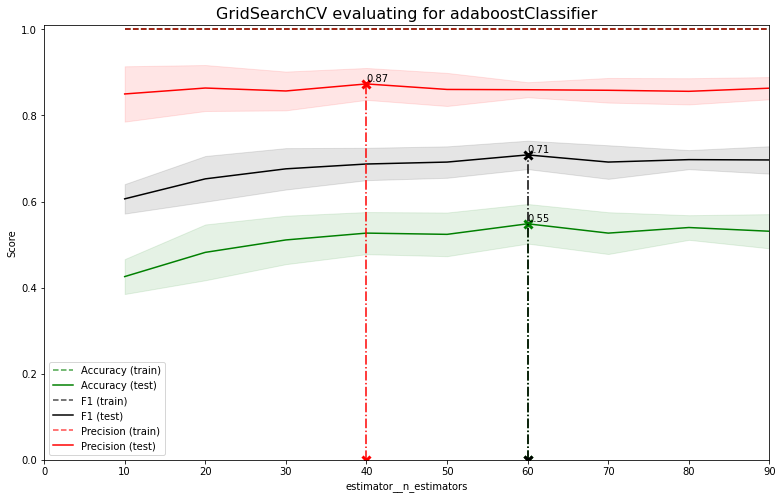

In [12]:
aff_DTS = utils_affichage.Affichage(model)

# display(aff_DTS.hyper_results())

aff_DTS.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_DTS.class_report(y_val, y_val_pred, mean_only=True))

aff_DTS.plot(param_abscissa="max_depth")

___


## Classifieur par KNeighbors
Une `KNeighbors` est une méthode d’apprentissage basé sur des exemples ou d’apprentissage non généralisé. Elle ne cherche pas à construire un modèle interne général, mais simplement à stocker des exemples de données de formation. La classification est calculée à la majorité simple des voisins les plus proches de chaque point: une classe de données est attribuée à un point de requête qui a le plus de représentants parmi les voisins les plus proches de ce point.


### KNN - Entrainement

On entraine maintenant le modèle sur les données completes.

In [5]:
model = KNNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train, accu_val = model.train_sans_grid()

print('Accuracy train: {:.3%}'.format(accu_train))
print('Accuracy validation: {:.3%}'.format(accu_val))

Accuracy train: 99.134%
Accuracy validation: 94.949%


### KNN - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
- `n_neighbors` : le nombre de voisins utilisés par défaut pour interroger.
- `leaf_size` : La taille des feuilles passées à BallTree ou KDTree. Cela peut affecter la vitesse de construction et de requête, ainsi que la mémoire nécessaire pour stocker l’arborescence. La valeur optimale dépend de la nature du problème.
- `weights` : la mesure de poids utilisée pour la prédiction.
- `metric` : La mesure de distance à utiliser pour l’arbre.

In [6]:
KNN_param = {
    'n_neighbors': list(range(1, 100)),
    'leaf_size': list(range(1, 100)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

model = KNNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
accu_train_hyperparm, accu_val_hyperparm, best_estimator, best_accu = model.train(KNN_param, random_search=True)

print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")
display(model.estimator.get_params())

print('Accuracy train: {:.3%}'.format(accu_train_hyperparm))
print('Accuracy validation: {:.3%}'.format(accu_val_hyperparm))


Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_cross_val_acc : 0.8197164007924096

Best estimator:
KNeighborsClassifier(leaf_size=5, n_jobs=4, n_neighbors=4)
[Estimator parameters]


{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 4,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

Accuracy train: 94.949%
Accuracy validation: 89.226%


In [7]:
# Append accuracy percentage for visual comparison
accu_dict["KNN"] = accu_val_hyperparm*100

### KNN - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test.

In [8]:
KNN_pred = model.predict(X_test)
KNN_pred_label = lblBin.inverse_transform(KNN_pred)

pred_dict["Kneighbors"] = KNN_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)



,Kneighbors
0,Quercus_Agrifolia
1,Quercus_Afares
2,Acer_Circinatum
3,Castanea_Sativa
4,Alnus_Viridis
...,...
589,Acer_Circinatum
590,Alnus_Rubra
591,Quercus_Canariensis
592,Quercus_Phillyraeoides


### KNN - Affichage des courbes d'apprentissage

On peut afficher les courbes d'apprentissage du modèle si on ne fait varier qu'un seul hyper parametre par une recherche complete.

In [ ]:
KNN_param = {
    'n_neighbors': list(range(1, 30))
}
model = KNNClassifier(X_train, y_train, X_val, y_val, class_names, scorers)
model.train(KNN_param, random_search=False)

Using complet search:
Fitting 5 folds for each of 29 candidates, totalling 145 fits


In [ ]:
aff_KNN = utils.Affichage(model)

# display(aff_KNN.hyper_results())

aff_KNN.best_estimators(n_top=2)

y_val_pred = model.predict(X_val)
display(aff_KNN.class_report(y_val, y_val_pred, mean_only=True))

aff_KNN.plot(param_abscissa="n_neighbors")

___


## Classifieur par regression logistique 
La régression logistique est un algorithme d’apprentissage automatique utilisé dans les problèmes de classification et qui a pour but attribuer des observations à un ensemble discret de classes, c’est un modèle linéaire. Grâce à la fonction sigmoïde logistique, la régression logistique transforme sa sortie en une probabilité d'appartenir à l'une ou à l'autre classe dans le cas binaire.

___
___

# 3. Comparaison des résultats

On compile les résultats des classifieurs étudiés pour les comparer sur leur 'accuracy'.



In [ ]:
___
___

# 4. Conclusions

